<a href="https://colab.research.google.com/github/Huynh-Truong-75/AI_day3/blob/main/BaiTap_FuzzyLogic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 2.1 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=f3a962d404ea99cfc5fc4a3b9796911897c06c34f28cbd4c87815ea7208df524
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [2]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np

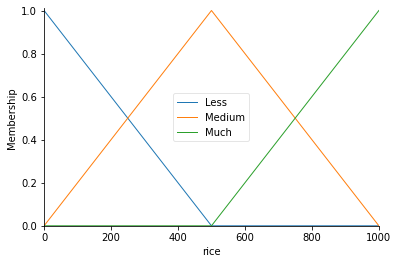

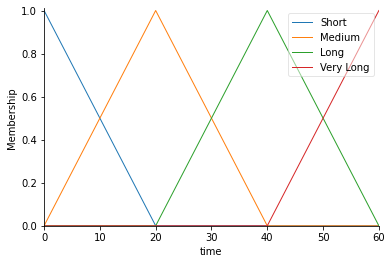

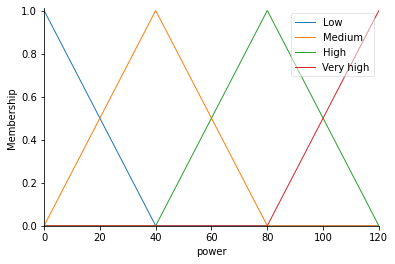

In [3]:
rice = ctrl.Antecedent(np.arange(0, 1100, 100), 'rice')
time = ctrl.Antecedent(np.arange(0, 70, 10), 'time')
power = ctrl.Consequent(np.arange(0, 130, 10), 'power')

names_rice = ['Less', 'Medium', 'Much']
names_time = ['Short', 'Medium', 'Long','Very Long']
names_power = ['Low', 'Medium', 'High','Very high']
rice.automf(names=names_rice)
time.automf(names=names_time)
power.automf(names=names_power)

rice.view()
time.view()
power.view()

In [4]:
rule1 = ctrl.Rule(rice['Less'] & time['Short'], power['Medium'])
rule2 = ctrl.Rule(rice['Less'] & time['Medium'], power['Low'])
rule3 = ctrl.Rule(rice['Less'] & time['Long'], power['Low'])
rule4 = ctrl.Rule(rice['Less'] & time['Very Long'], power['Low'])
rule5 = ctrl.Rule(rice['Medium'] & time['Short'], power['High'])
rule6 = ctrl.Rule(rice['Medium'] & time['Medium'], power['Medium'])
rule7 = ctrl.Rule(rice['Medium'] & time['Long'], power['Low'])
rule8 = ctrl.Rule(rice['Medium'] & time['Very Long'], power['Low'])
rule9 = ctrl.Rule(rice['Much'] & time['Short'], power['Very high'])
rule10 = ctrl.Rule(rice['Much'] & time['Medium'], power['High'])
rule11 = ctrl.Rule(rice['Much'] & time['Long'], power['Medium'])
rule12 = ctrl.Rule(rice['Much'] & time['Very Long'], power['Low'])

32.90030211480363


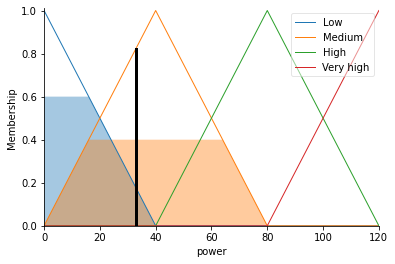

In [7]:
system_ctrl= ctrl.ControlSystem(rules=[rule1, rule1, rule2, rule3, rule4,
rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])
system=ctrl.ControlSystemSimulation(system_ctrl)
system.input['rice']=700
system.input['time']=40
system.compute()
print(system.output['power'])
power.view(sim=system)